In [1]:
import ray
# Starting the Ray client. This connects to a remote Ray cluster.
ray.init('ray://192.168.88.197:10002')

SIGTERM handler is not set because current thread is not the main thread.


Python version:,3.12.5
Ray version:,2.35.0
Dashboard:,http://192.168.88.192:8265


In [2]:
import arviz as az
import matplotlib.pyplot as plt
from lifetimes.datasets import load_cdnow_summary

from pymc_marketing import clv

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"


@ray.remote
def fit_model_more_local(model):
    idata_nutpie = model.fit(nuts_sampler="nutpie", **sampler_kwargs)
    return idata_nutpie


df = (
    load_cdnow_summary(index_col=[0])
    .reset_index()
    .rename(columns={"ID": "customer_id"})
)
sampler_kwargs = {
    "draws": 2_0,
    "target_accept": 0.9,
    "chains": 1,
    "random_seed": 42,
}

model = clv.BetaGeoModel(data=df)
object_ref = fit_model_more_local.remote(model)
x = ray.get(object_ref)
print(x)





WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


(fit_model_more_local pid=4124498) WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
(fit_model_more_local pid=4124498) Only 20 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
(raylet) [2024-09-09 16:22:14,506 E 4118311 4118351] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-09-09_16-12-42_599144_4117919 is over 95% full, available space: 40509448192; capacity: 942434742272. Object creation will fail if spilling is required.
(fit_model_more_local pid=4124498) /home/korny/micromamba/envs/pymc-server/lib/python3.12/site-packages/nutpie/compile_pymc.py:554: NumbaWarning: Cannot cache compiled function "numba_funcified_fgraph" as it uses dynamic globals (such as ctypes pointers and large global arrays)
(fit_model_more_local pid=4124498)   return inner(x)


(fit_model_more_local pid=4124498) else


(raylet) [2024-09-09 16:22:24,515 E 4118311 4118351] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-09-09_16-12-42_599144_4117919 is over 95% full, available space: 40508035072; capacity: 942434742272. Object creation will fail if spilling is required.
(raylet) [2024-09-09 16:22:34,528 E 4118311 4118351] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-09-09_16-12-42_599144_4117919 is over 95% full, available space: 40507617280; capacity: 942434742272. Object creation will fail if spilling is required.
(raylet) [2024-09-09 16:22:44,540 E 4118311 4118351] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-09-09_16-12-42_599144_4117919 is over 95% full, available space: 40507576320; capacity: 942434742272. Object creation will fail if spilling is required.
(raylet) [2024-09-09 16:22:54,553 E 4118311 4118351] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-09-09_16-12-42_599144_4117919 is over 95% full, available space: 40507551744; capacity: 94243

Inference data with groups:
	> posterior
	> sample_stats
	> fit_data

Warmup iterations saved (warmup_*).


In [3]:
idata_nutpie = x

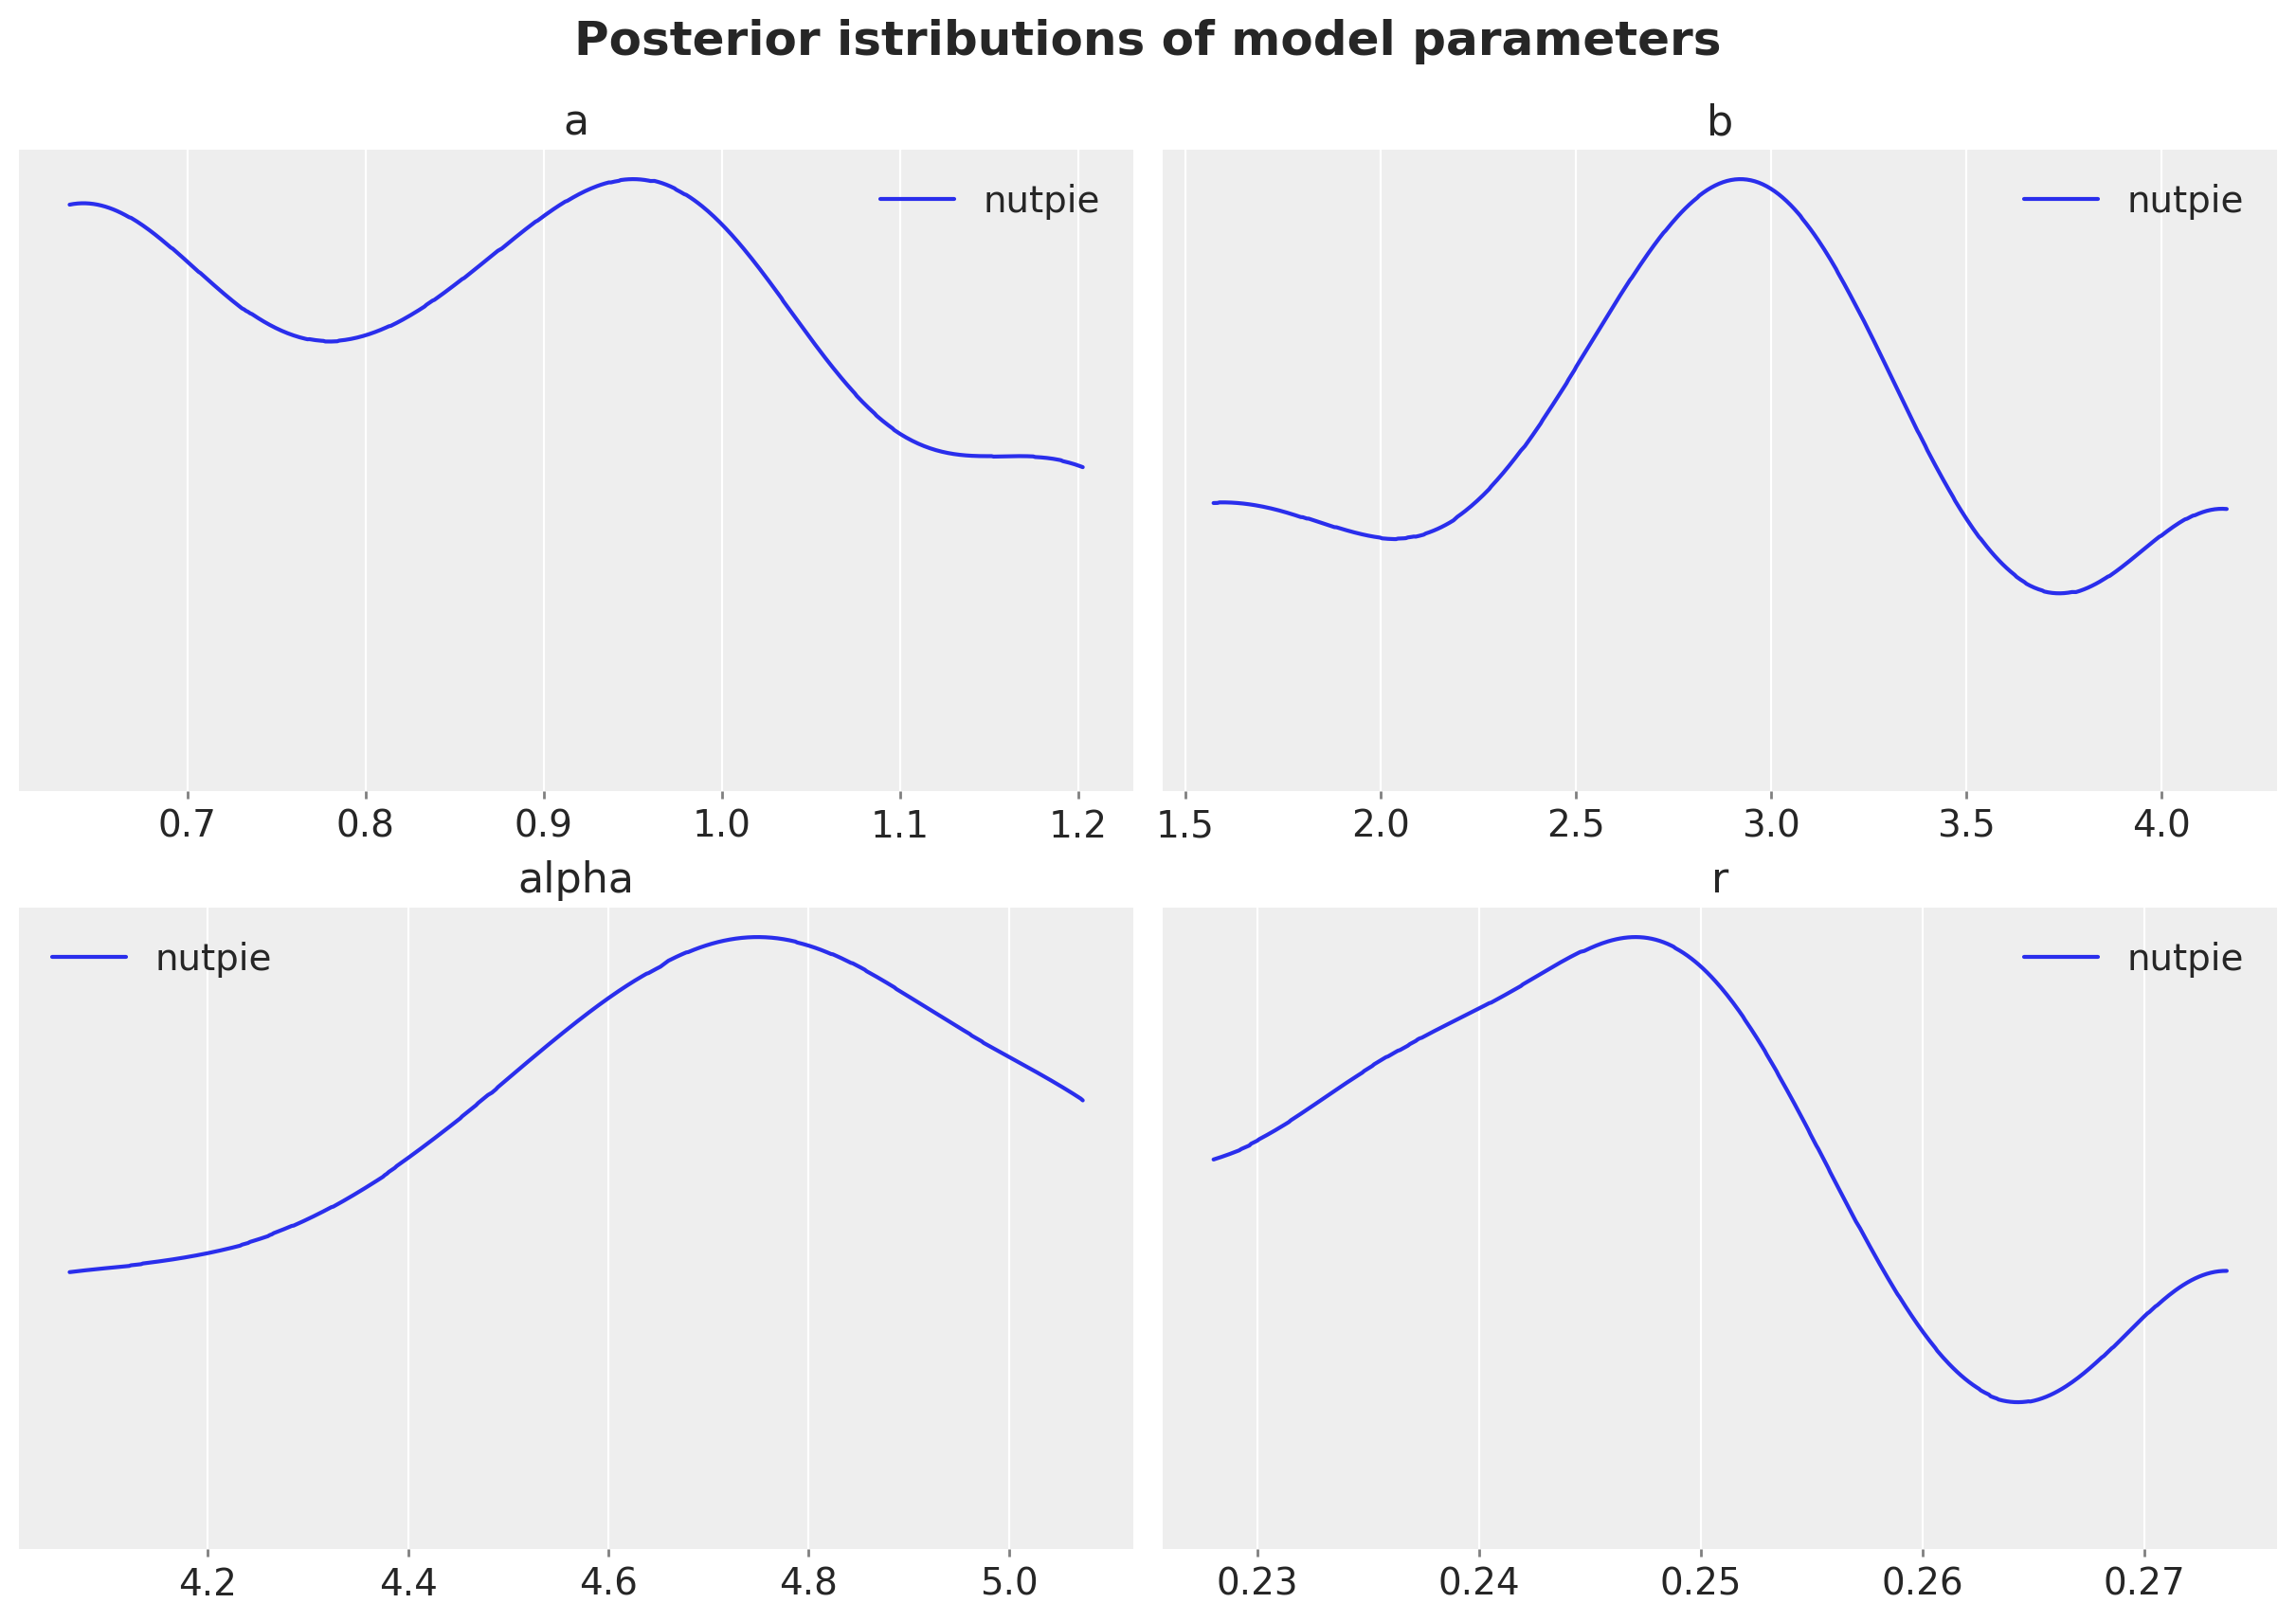

In [4]:
import arviz as az
import matplotlib.pyplot as plt
from lifetimes.datasets import load_cdnow_summary

from pymc_marketing import clv

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(12, 8), sharex=False, sharey=False, layout="constrained"
)

axes = axes.ravel()

for i, var_name in enumerate(["a", "b", "alpha", "r"]):
    for j, (idata, label) in enumerate(
        zip(
            [
                idata_nutpie],
            [ "nutpie"],
            strict=False,
        )
    ):
        az.plot_posterior(
            data=idata,
            var_names=[var_name],
            color=f"C{j}",
            point_estimate=None,
            hdi_prob="hide",
            label=label,
            ax=axes[i],
        )

fig.suptitle(
    "Posterior istributions of model parameters",
    fontsize=18,
    fontweight="bold",
    y=1.05,
);
